## pmdarima Auto-ARIMA
pmdarima or pyramid arima is a third-party tool separate from statsmodels. To install, at a terminal run:<br>
&nbsp;&nbsp;&nbsp;&nbsp;<tt>pip install pmdarima</tt><br>
this is capable of choosing best p,d,q values for ARIMA model along with penalizing the higher order terms if there isn't much improvement hence avoiding overfitting

In [3]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

# load a non-stationary dataset
df1 = pd.read_csv('data/airline_passengers.csv', index_col='Month', parse_dates=True)
df1.index.freq = 'MS'

# load a stationary dataset
df2 = pd.read_csv('data/DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
df2.index.freq = 'D'

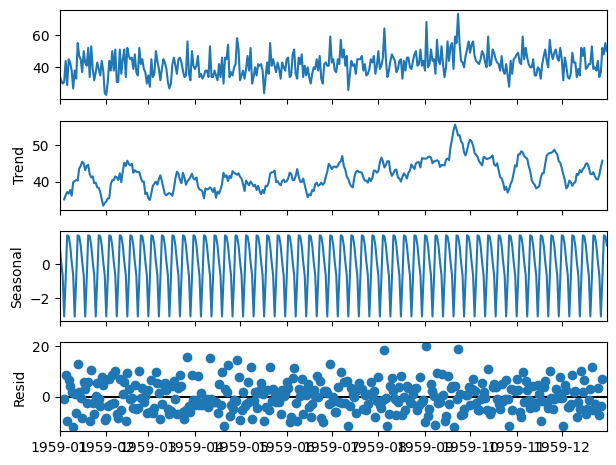

In [7]:
seasonal_decompose(df2).plot();

In [13]:
stepwise_model = auto_arima(df2['Births'], start_p=0, start_q=0, max_p=6, max_q=3, seasonal=False, trace=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2650.760, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2565.234, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2463.584, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2648.768, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2460.154, Time=0.99 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2461.271, Time=0.62 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2460.722, Time=0.38 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2536.154, Time=0.26 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2463.046, Time=1.21 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2459.074, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2462.221, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2563.261, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2460.367, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

In [14]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.537
Date:                Wed, 24 Apr 2024   AIC                           2459.074
Time:                        09:24:29   BIC                           2470.766
Sample:                    01-01-1959   HQIC                          2463.721
                         - 12-31-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1252      0.060      2.097      0.036       0.008       0.242
ma.L1         -0.9624      0.017    -56.429      0.000      -0.996      -0.929
sigma2        49.1512      3.250     15.122      0.000      42.781      55.522
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                25.33
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

We can see how this was determined by looking at the stepwise results. The recommended order is the one with the lowest <a href='https://en.wikipedia.org/wiki/Akaike_information_criterion'>Akaike information criterion</a> or AIC score. Note that the recommended model may <em>not</em> be the one with the closest fit. The AIC score takes complexity into account, and tries to identify the best <em>forecasting</em> model.

Let's check non-stationary data

In [15]:
stepwise_fit = auto_arima(df1['Thousands of Passengers'], start_p=0, start_q=0, max_p=4, max_q=3, seasonal=True, trace=True, m=12)
#start_P=0, d=1, D=1, error_action='ignore', suppress_warnings=True, stepwise=True

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.46 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.20 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.47 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.52 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=4.25 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.76 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.66 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=1.38 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=1.88 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=1.38 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.48 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=4.43 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [16]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Wed, 24 Apr 2024   AIC                           1019.178
Time:                                     09:26:22   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""